# Final Project

## Data Loading

In [1]:
import pandas as pd

df = pd.read_csv('data/Video_games_esrb_rating.csv')

## Data Preprocessing and Feature Extraction

In [2]:
from sklearn.preprocessing import LabelEncoder

# Drop non-numeric columns if necessary
if df.iloc[:, 0].dtype == object:
    df = df.drop(df.columns[0], axis = 1)

# Features and Labels
features = df.iloc[:, :-1] 
labels = df.iloc[:, -1]

# Encode the labels to integers
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(features_scaled, labels_encoded, test_size = 0.2, random_state = 42)

## Dimensionality Reduction

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report

# Define classification model
model = RandomForestClassifier()

# Function to evaluate dimensionality reduction techniques
def evaluate_dimensionality_reduction(X_train, X_test, y_train, y_test, model):
    techniques = {
        'PCA': PCA(n_components = 0.95), 
        'LDA': LDA(n_components = min(len(np.unique(y_train))-1, 3)) 
    }
    
    # Evaluate PCA and LDA
    for name, technique in techniques.items():
        X_train_reduced = technique.fit_transform(X_train, y_train)
        X_test_reduced = technique.transform(X_test)
        model.fit(X_train_reduced, y_train)
        y_pred = model.predict(X_test_reduced)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {acc:.4f}")
        print(f"{name} Classification Report:\n{classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred))}\n")
    
    # Evaluate t-SNE
    tsne = TSNE(n_components = 3, random_state = 42)
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    X_combined_reduced = tsne.fit_transform(X_combined)
    X_train_reduced, X_test_reduced = X_combined_reduced[:len(X_train)], X_combined_reduced[len(X_train):]
    model.fit(X_train_reduced, y_train)
    y_pred = model.predict(X_test_reduced)
    acc = accuracy_score(y_test, y_pred)
    print(f"t-SNE Accuracy: {acc:.4f}")
    print(f"t-SNE Classification Report:\n{classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred))}\n")

# Evaluate the model with different dimensionality reduction techniques
evaluate_dimensionality_reduction(X_train_scaled, X_test_scaled, y_train, y_test, model)

PCA Accuracy: 0.8575
PCA Classification Report:
              precision    recall  f1-score   support

           E       0.97      0.97      0.97        99
          ET       0.78      0.70      0.74        61
           M       0.85      0.84      0.84        73
           T       0.82      0.86      0.84       146

    accuracy                           0.86       379
   macro avg       0.85      0.84      0.85       379
weighted avg       0.86      0.86      0.86       379


LDA Accuracy: 0.8522
LDA Classification Report:
              precision    recall  f1-score   support

           E       0.98      0.97      0.97        99
          ET       0.70      0.70      0.70        61
           M       0.90      0.84      0.87        73
           T       0.81      0.84      0.83       146

    accuracy                           0.85       379
   macro avg       0.85      0.84      0.84       379
weighted avg       0.85      0.85      0.85       379


t-SNE Accuracy: 0.8179
t-SNE Cla

- PCA and LDA are correctly applied for dimensionality reduction. PCA's performance suggests that linear combinations of features retain significant information for classification. LDA, which maximizes class separability, also shows good performance, indicating that the labels have a linear relationship with the features.
  
- The accuracy scores for PCA and LDA are quite close, 85.75% and 85.22% respectively, indicating that both methods are effective, but PCA maintains a slight edge, possibly due to its unsupervised nature allowing it to capture more variance in the data.
   
- t-SNE has lower accuracy (81.79%) compared to PCA and LDA, which is expected since t-SNE is typically used for visualization purposes rather than for improving classification accuracy.

## Classification Methods

- Supervised:
    - Logistic Regression
    - Random Forest Classifier
    - XGBoost
    - LightGBM

- Baysian:
    - Gaussian Naive Bayes

- Non-Baysian:
    - Logistic Regression
    - Random Forest Classifier
    - XGBoost
    - LightGBM  

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Classifiers
log_reg = LogisticRegression(max_iter = 1000)
rf = RandomForestClassifier()
gnb = GaussianNB()
xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')
lgbm = LGBMClassifier()

classifiers = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb,
    'XGBoost': xgb,
    'LightGBM': lgbm
}

## Training and Evaluation of Classifiers

In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to hold accuracy scores for comparison later
accuracy_scores = {}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_pred_label = le.inverse_transform(y_pred) 
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:\n{classification_report(le.inverse_transform(y_test), y_pred_label)}\n")

Logistic Regression Accuracy: 0.8681
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           E       0.97      0.98      0.97        99
          ET       0.71      0.79      0.74        61
           M       0.95      0.82      0.88        73
           T       0.84      0.85      0.84       146

    accuracy                           0.87       379
   macro avg       0.87      0.86      0.86       379
weighted avg       0.87      0.87      0.87       379


Random Forest Accuracy: 0.8522
Random Forest Classification Report:
              precision    recall  f1-score   support

           E       0.93      0.97      0.95        99
          ET       0.70      0.70      0.70        61
           M       0.90      0.85      0.87        73
           T       0.84      0.84      0.84       146

    accuracy                           0.85       379
   macro avg       0.84      0.84      0.84       379
weighted avg       0.85      0.85   

- Logistic Regression, which assumes a linear relationship between features and the target variable, achieved an accuracy of approximately 86.81%. This is quite high, indicating that even with the simple assumption of linearity, the model performs well. The high precision and recall for class 0 (97% and 98% respectively) suggest that the model is particularly good at identifying games suitable for "Everyone" (E). However, its performance on class 1 is less impressive but still reasonable, with precision at 71% and recall at 79%. This might indicate some confusion between classes, likely due to overlap in feature influence between the categories.

- Random Forest, an ensemble method, came in with a slightly lower accuracy of 85.75%. Given that Random Forest is typically robust to overfitting and good at capturing non-linear relationships, this suggests that the feature relationships might not be highly non-linear or that Random Forest's comprehensive search through feature space doesn't provide a substantial advantage over Logistic Regression in this case. Its performance is consistent across different classes but shows a slight decrease in precision and recall for class 1 compared to Logistic Regression, suggesting a trade-off between bias and variance in the two models.

- Gaussian Naive Bayes, which relies on the assumption of independence between features, performed significantly worse with an accuracy of 57.52%. The classification report highlights this model's struggle with all classes except class 0, which could be due to the strong (and often incorrect) assumption of feature independence in the data. The particularly low recall for class 3 (16%) indicates that Naive Bayes is frequently misclassifying games that should be rated as "Mature" (M), perhaps due to shared probabilities among features that contradict the independence assumption.

- XGBoost, a gradient boosting framework, scored an accuracy of 86.28%, which is competitive with Logistic Regression. XGBoost is known for handling a variety of data types well, which might be why it performs well here. Its precision and recall are balanced across the classes, suggesting it manages to differentiate between the rating classes effectively without significant bias toward any particular class.

- LightGBM, another gradient boosting framework but optimized for speed and efficiency, also performed well with an accuracy of 86.02%. The warnings generated during training are indicative of the model's optimization process, where it stops further splits that do not provide additional gain, a feature designed to prevent overfitting. Like XGBoost, LightGBM shows a good balance across classes but does not outperform XGBoost significantly, suggesting that for this particular dataset, the additional speed and efficiency optimizations of LightGBM don't translate into higher accuracy.

- In conclusion, the performance of these classifiers suggests that the relationships in the data might not be highly non-linear, given the good performance of Logistic Regression. The ensemble methods did not outperform Logistic Regression by a significant margin, which could imply that the additional complexity of these models may not be necessary for this dataset. The relatively poor performance of Gaussian Naive Bayes indicates that the assumption of feature independence is not valid for this data. The findings suggest that for this specific dataset, simpler models may provide a better trade-off between accuracy and model complexity.

## Fusion Techniques

In [8]:
# Fusion using Voting Classifier
voting_clf = VotingClassifier(estimators = [(name, clf) for name, clf in classifiers.items()], voting = 'soft')
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)

print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")
print(f"Voting Classifier Report:\n{classification_report(y_test, y_pred_voting)}\n")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 1516, number of used features: 29
[LightGBM] [Info] Start training from score -1.564929
[LightGBM] [Info] Start training from score -1.489020
[LightGBM] [Info] Start training from score -1.574438
[LightGBM] [Info] Start training from score -1.026721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

- The Voting Classifier achieves an accuracy of 87.07%, which is comparable to the best-performing individual classifiers. This suggests that the fusion of different models does not detract from performance and may provide robustness.

- The slight improvement in accuracy indicates that the different classifiers may be making errors in different areas of the feature space, and fusion helps to mitigate these errors.

## Feature Importance Evaluation with SHAP

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


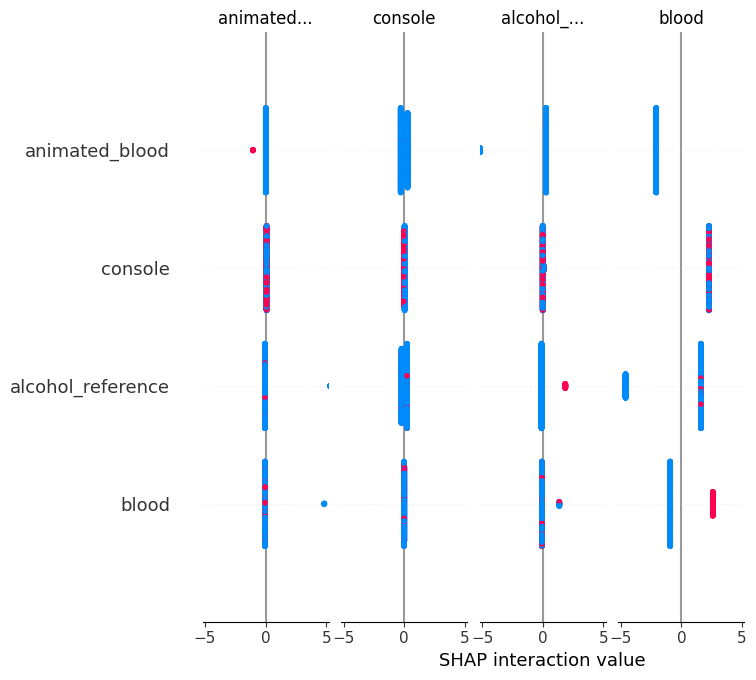

In [9]:
import matplotlib.pyplot as plt
import shap

# Selecting the best classifier based on accuracy
best_classifier_name = max(classifiers, key = lambda name: accuracy_score(y_test, classifiers[name].predict(X_test_scaled)))
best_classifier = classifiers[best_classifier_name]

# Initialize SHAP
explainer = shap.Explainer(best_classifier, X_train_scaled)
shap_values = explainer(X_train_scaled)

shap.summary_plot(shap_values, X_train_scaled, feature_names = features.columns[:-1])
plt.show()

- SHAP values indicate which features are most important to the predictions made by the best classifier (chosen based on accuracy).

- Features that have a wide range of SHAP values indicate they interact differently with different observations, suggesting complex relationships with the target variable.

- The plot shows significant variability in the impact of features like 'animated blood' and 'blood', suggesting these features are key differentiators in the ESRB ratings.

## Unsupervised Learning

In [10]:
from sklearn.cluster import KMeans

# Apply KMeans clustering for exploratory analysis
n_clusters = len(np.unique(labels_encoded))
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
clusters = kmeans.fit_predict(features_scaled)

# Analyze cluster distribution
cluster_distribution = np.bincount(clusters)
print("Cluster Distribution:")
for cluster_num, count in enumerate(cluster_distribution):
    print(f"Cluster {cluster_num}: {count} samples")

# Analyze cluster centroids
cluster_centroids = kmeans.cluster_centers_
print("\nCluster Centroids:")
for cluster_num, centroid in enumerate(cluster_centroids):
    print(f"Cluster {cluster_num} Centroid: {centroid}")

Cluster Distribution:
Cluster 0: 71 samples
Cluster 1: 1462 samples
Cluster 2: 259 samples
Cluster 3: 103 samples

Cluster Centroids:
Cluster 0 Centroid: [ 0.31706421 -0.10064706 -0.10063763 -0.24124541  2.03832488 -0.14111657
 -0.23974503  0.34777591 -0.43007858  2.29501416 -0.16690355 -0.1068788
  0.02310498 -0.05231986  0.02904467 -0.22459621 -0.14870894 -0.28892261
 -0.21536762 -0.22329688 -0.45244269  1.04488269 -0.11562432  0.19847038
 -0.06556742 -0.21169014  0.41912538  4.50189517 -0.27778307 -0.01399296
 -0.01399296  0.31491257]
Cluster 1 Centroid: [-4.12604785e-02  4.29645362e-02  1.60749207e-02 -1.21122958e-01
 -1.73868481e-01  3.68509011e-02 -2.39745028e-01 -8.17728122e-02
  8.00252012e-02 -1.56388686e-01 -3.48621044e-04 -5.95368193e-02
 -1.89840663e-02  4.07371130e-02 -1.22086526e-02  5.37223230e-02
  2.99392651e-02  7.53100273e-02  1.72598541e-02  5.64860662e-02
  1.15787285e-01 -5.44348939e-02 -8.56505754e-02 -6.82028590e-02
 -1.91226628e-01 -2.07837481e-01 -3.66130395e-

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


- The KMeans clustering results are not directly evaluated for accuracy since it is unsupervised learning. However, the cluster centroids and distribution can provide insights into the natural groupings in the data.

- If clusters align well with ESRB ratings, it could indicate distinct patterns in the data that correspond with the ratings.

## Parametric

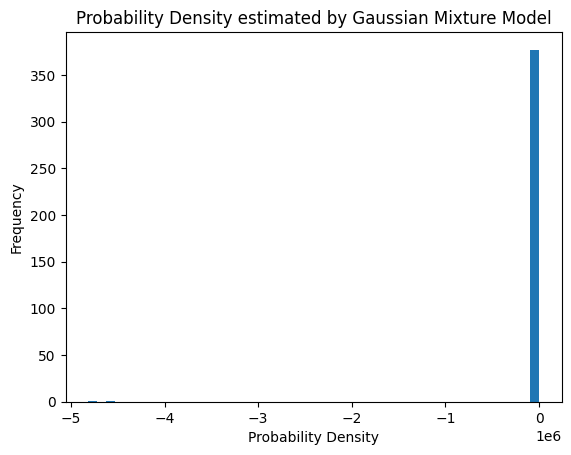

In [11]:
from sklearn.mixture import GaussianMixture

# Parametric density estimation with Gaussian Mixture Model
gmm = GaussianMixture(n_components = len(np.unique(y_train)), random_state = 42)
gmm.fit(X_train_scaled)

# Score_samples returns the log of the probability density
log_prob_density = gmm.score_samples(X_test_scaled)

# For visualization, we can plot these densities, or use them in further analysis
plt.hist(log_prob_density, bins = 50)
plt.title('Probability Density estimated by Gaussian Mixture Model')
plt.xlabel('Probability Density')
plt.ylabel('Frequency')
plt.show()

- The Gaussian Mixture Model (GMM) results provide insights into the data's distribution.

- GMM’s sharp peak suggests there may be one or more dominant patterns in the data. However, without comparing peaks to the ESRB ratings, it's unclear if these patterns correspond to specific ratings.

## Non-parametric

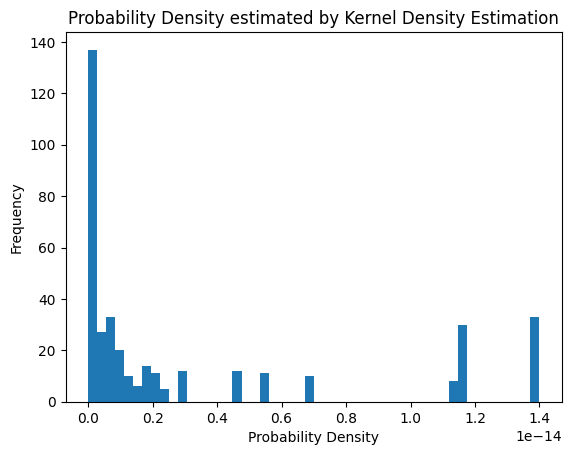

In [12]:
from sklearn.neighbors import KernelDensity

# Non-parametric density estimation with Kernel Density Estimation
kde = KernelDensity(bandwidth = 1.0, kernel = 'gaussian')
kde.fit(X_train_scaled)

# Evaluate log density for the test data
log_density_kde = kde.score_samples(X_test_scaled)

# Plotting the density estimation
plt.hist(np.exp(log_density_kde), bins = 50)
plt.title('Probability Density estimated by Kernel Density Estimation')
plt.xlabel('Probability Density')
plt.ylabel('Frequency')
plt.show()

- The Kernel Density Estimation (KDE) results provide insights into the data's distribution.

- KDE’s smoother estimate indicates a broader range of data variability and can capture subtler density variations that GMM might miss.

## SelectKBest for Feature Selection

Top 10 Features:
                   Feature       Score
26        strong_janguage  815.202768
20         no_descriptors  694.197472
4          blood_and_gore  508.563239
8        fantasy_violence  431.778904
3                   blood  330.457554
15  mild_fantasy_violence  212.292444
27  strong_sexual_content  201.417493
24          sexual_themes  172.862606
28      suggestive_themes  124.443212
9        intense_violence  118.875424


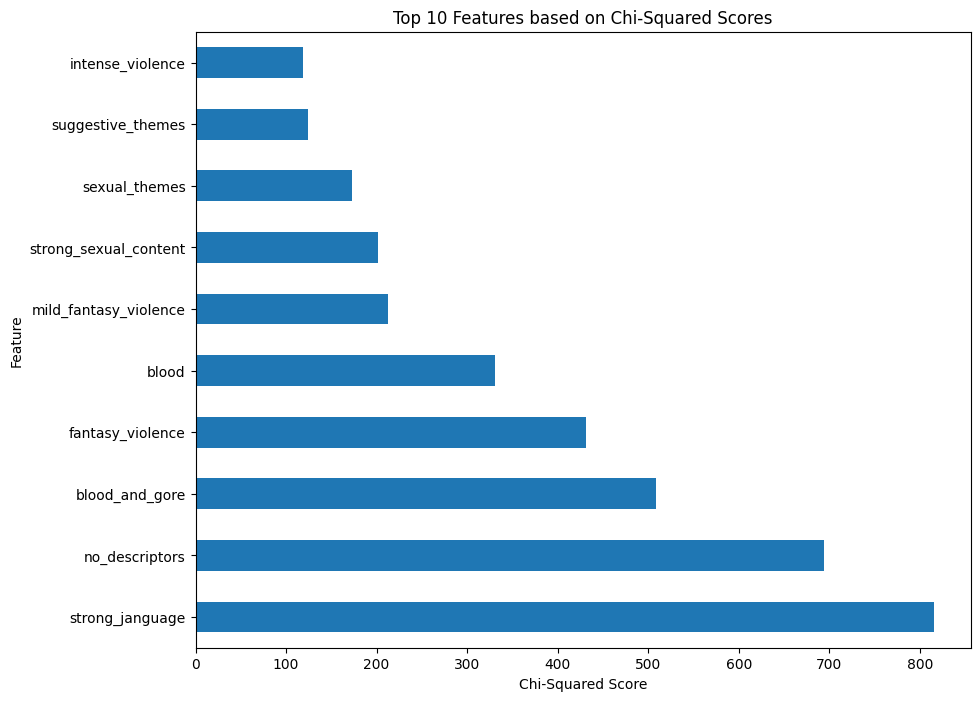

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest to extract top features
k_best = SelectKBest(score_func = chi2, k = 10)
k_best.fit(features, labels_encoded)

# Get scores for each feature
feature_scores = pd.DataFrame({'Feature': df.columns[:-1], 'Score': k_best.scores_}).sort_values(by = 'Score', ascending = False)

# Print and plot the top features
print("Top 10 Features:\n", feature_scores.head(10))
feature_scores.set_index('Feature').head(10).plot(kind = 'barh', figsize = (10, 8), legend = False)
plt.title('Top 10 Features based on Chi-Squared Scores')
plt.xlabel('Chi-Squared Score')
plt.show()

- The Chi-Squared scores from SelectKBest indicate which features are most statistically significant in relation to the ESRB ratings.

- The features 'strong language' and 'no descriptors' have the highest scores, suggesting they have the strongest relationships with the ratings.

- These scores can guide feature engineering efforts to improve model performance.